## **import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

## **EDA**

In [2]:
titanic=pd.read_csv("Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.duplicated().sum()

0

## **visualization**

In [7]:
sex_counts=titanic['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

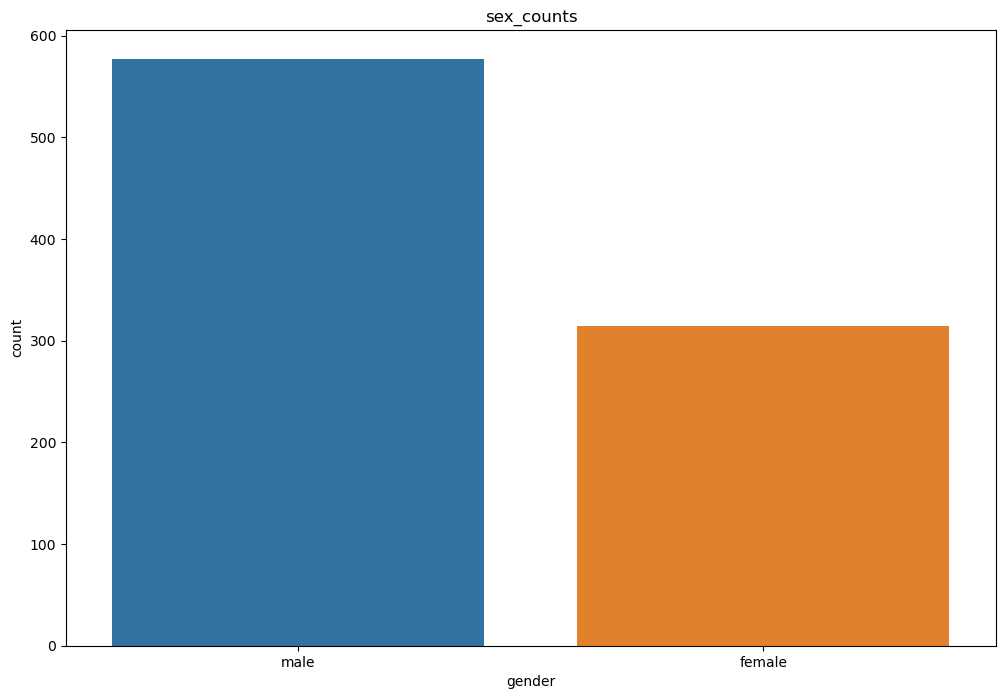

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values)
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

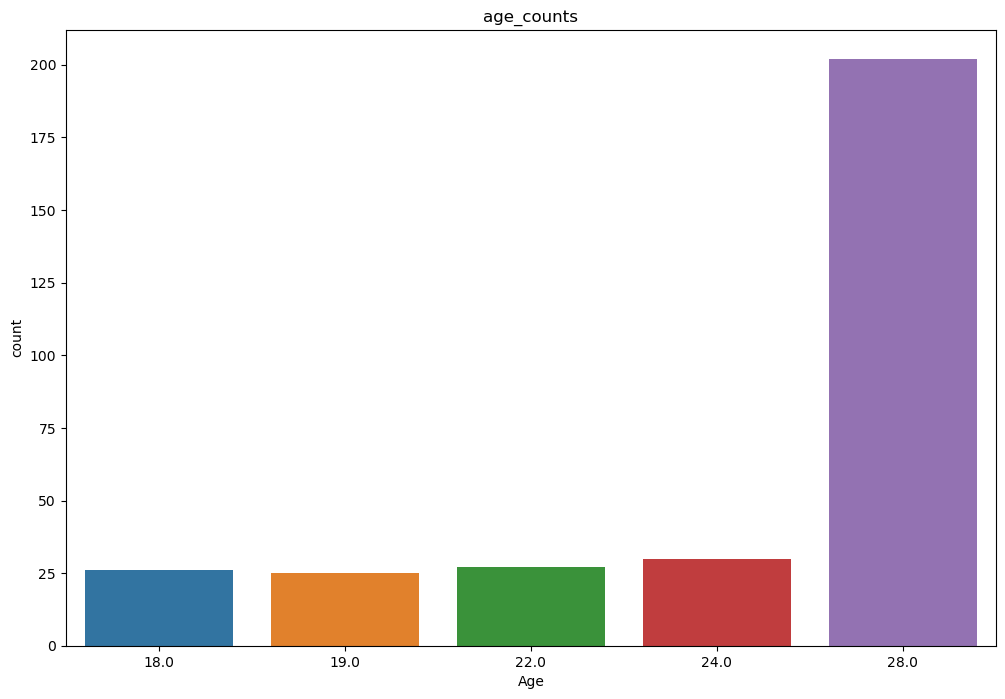

Age
28.0    202
24.0     30
22.0     27
18.0     26
19.0     25
Name: count, dtype: int64

In [43]:
age_counts=titanic['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values)
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [10]:
pclass_counts=titanic['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

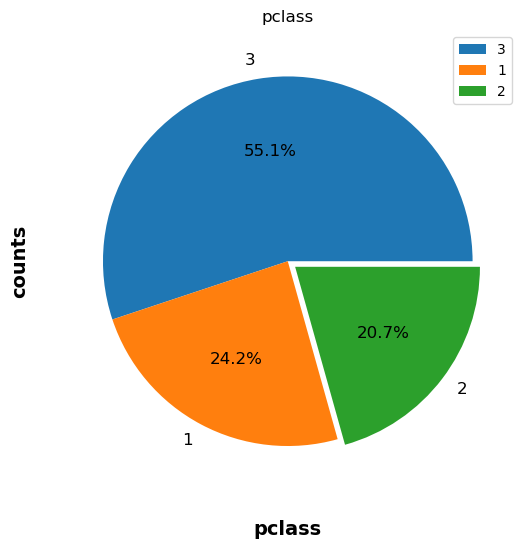

In [11]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [12]:
SibSp_counts=titanic['SibSp'].value_counts()
SibSp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

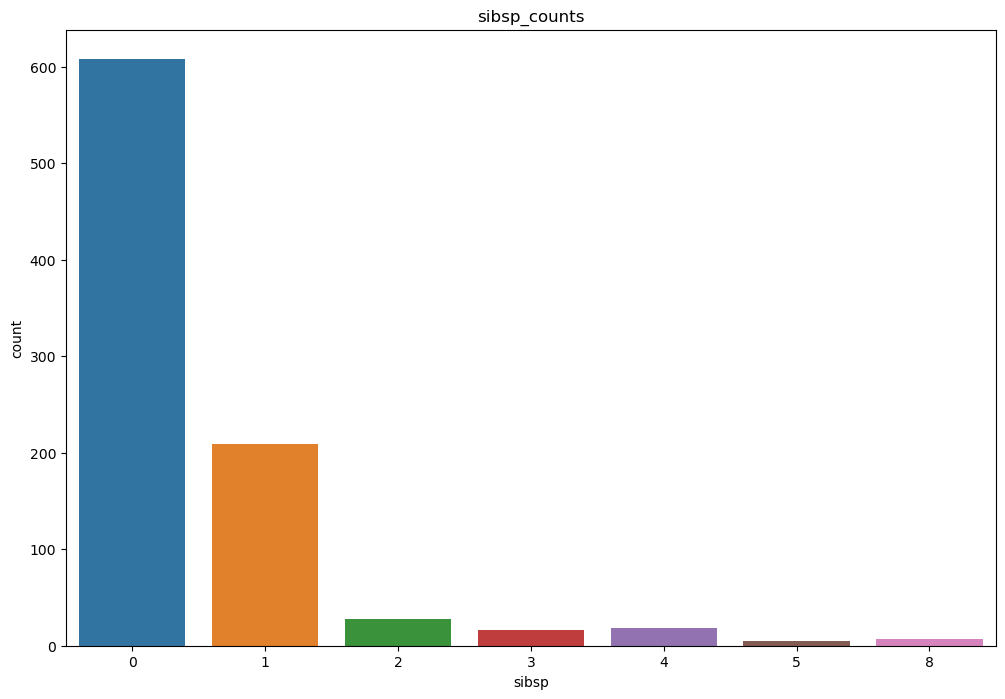

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values)
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

In [14]:
Parch_counts=titanic['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

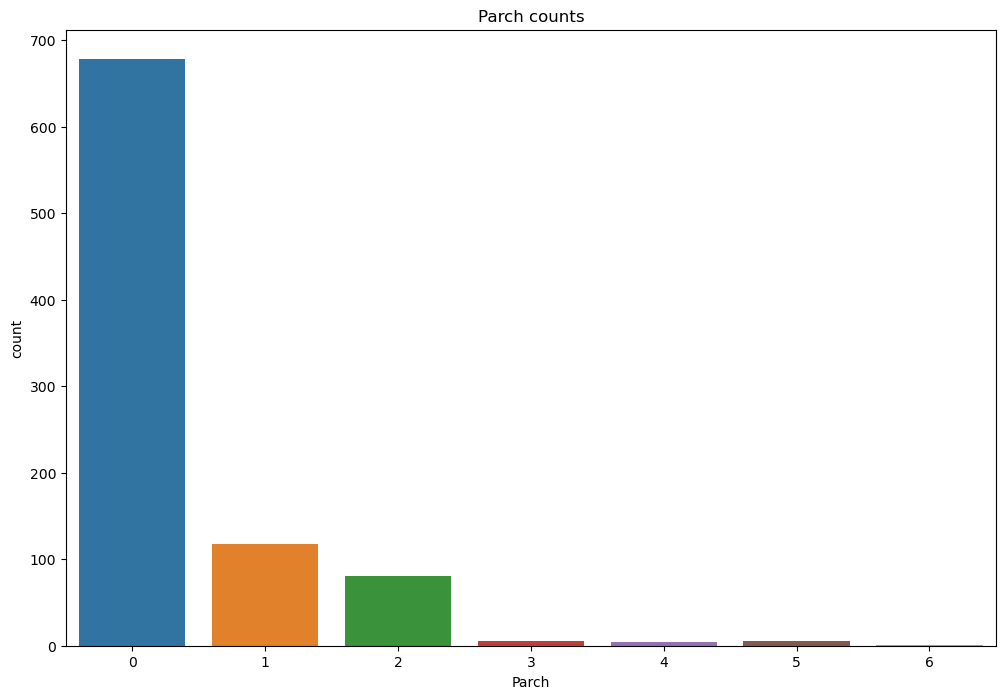

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values)
plt.title('Parch counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [16]:
Embarked_counts=titanic['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

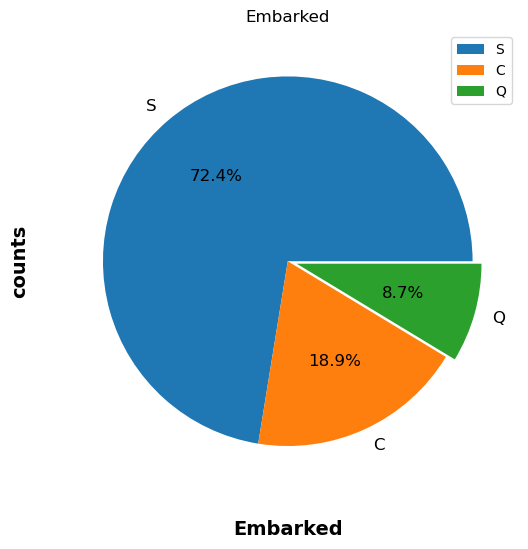

In [17]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

In [18]:
Survived_counts=titanic['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

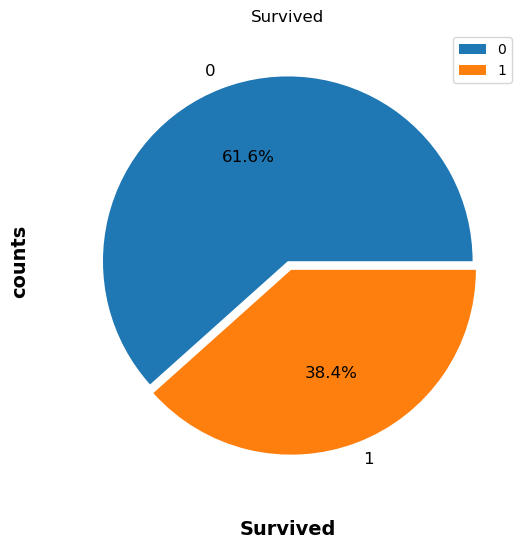

In [19]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

### visulize ages are survived or not

C:\Users\rohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


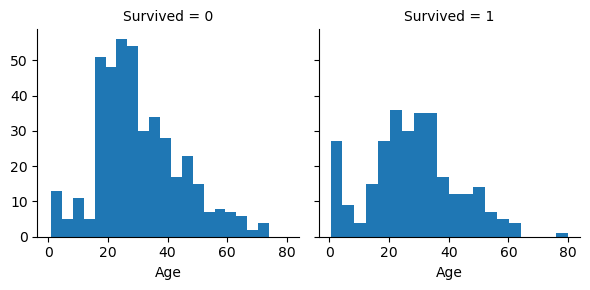

In [20]:
age=sns.FacetGrid(titanic,col='Survived')
age.map(plt.hist,'Age',bins=20)

## visulize gender is survived or not

C:\Users\rohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


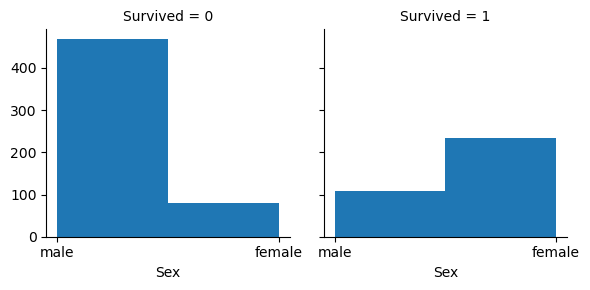

In [21]:
gender=sns.FacetGrid(titanic,col='Survived')

gender.map(plt.hist,'Sex',bins=2)

## visulize sibsp is survived or not

C:\Users\rohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


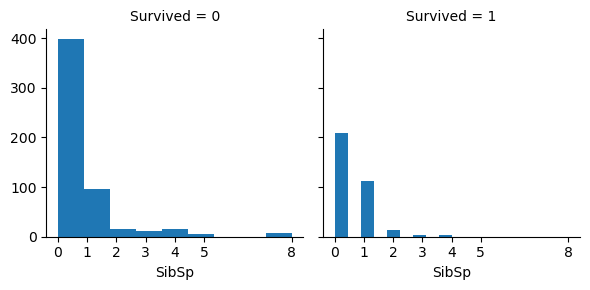

In [22]:
sibsp=sns.FacetGrid(titanic,col='Survived')
plt.xticks(SibSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

## visulize pclass is survived or not

C:\Users\rohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


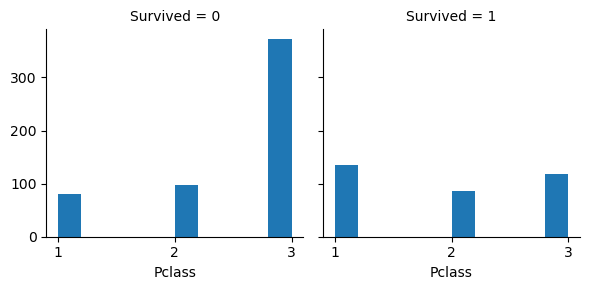

In [23]:
pclass=sns.FacetGrid(titanic,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

## visulize Parch is survived or notParch

C:\Users\rohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


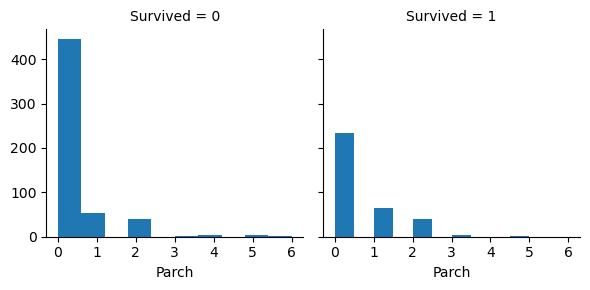

In [24]:
pclass=sns.FacetGrid(titanic,col='Survived')
plt.xticks(Parch_counts.index)
pclass.map(plt.hist,'Parch')

## **Data Preprocessing**

In [25]:
titanic=titanic.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
### convert the gender to binary 0 and 1
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [27]:
# Fill missing values in age column by imputing the median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
# Fill missing values in embarked column by imputing the mode
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [30]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


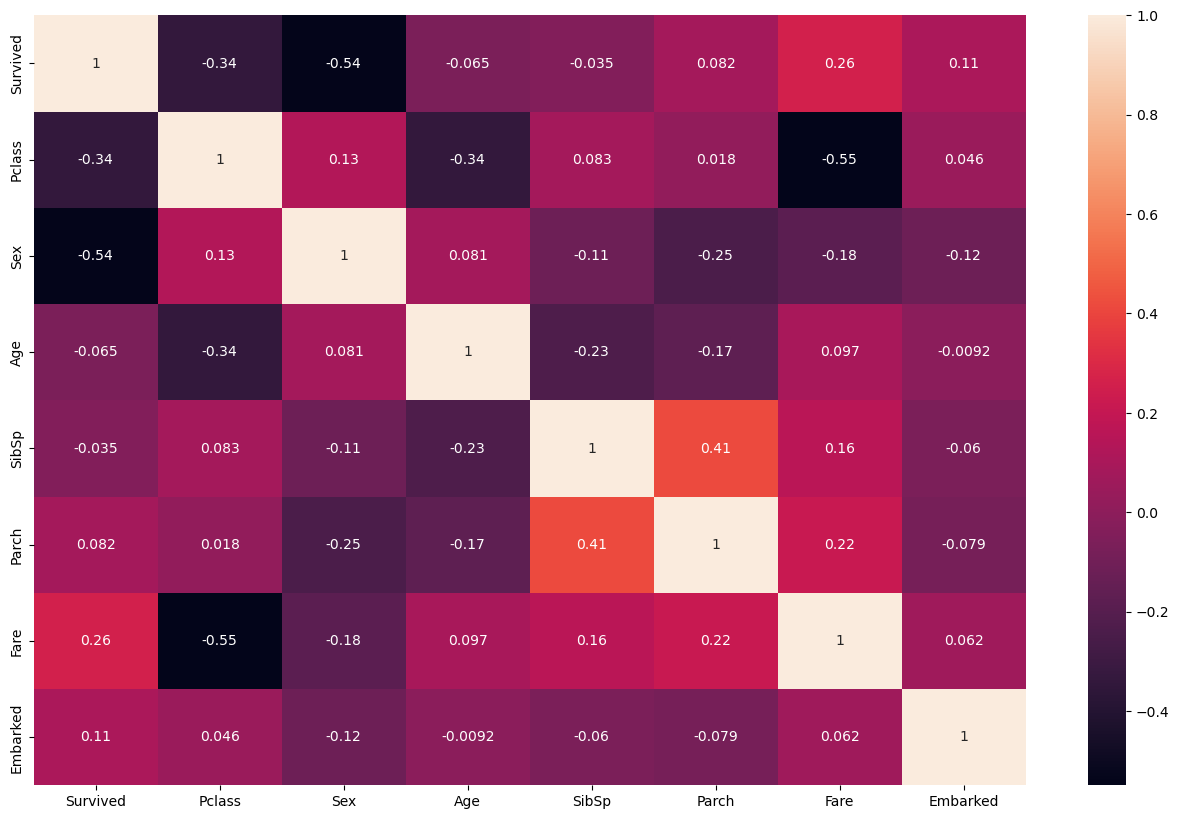

In [31]:
plt.figure(figsize=(16, 10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

## **define features and target**

In [32]:
x=titanic.drop(columns=['Survived'])
y=titanic['Survived']

## **Data scaling**

In [33]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

## **reshape to y**

In [34]:
y=y.values.reshape(-1,1)

## **split data**

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

## **Model**

## **XGBoost**

In [36]:
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68007
[1]	validation_0-logloss:0.67957
[2]	validation_0-logloss:0.67906
[3]	validation_0-logloss:0.67855
[4]	validation_0-logloss:0.67805
[5]	validation_0-logloss:0.67754
[6]	validation_0-logloss:0.67704
[7]	validation_0-logloss:0.67654
[8]	validation_0-logloss:0.67604
[9]	validation_0-logloss:0.67554
[10]	validation_0-logloss:0.67504
[11]	validation_0-logloss:0.67454
[12]	validation_0-logloss:0.67405
[13]	validation_0-logloss:0.67355
[14]	validation_0-logloss:0.67306
[15]	validation_0-logloss:0.67256
[16]	validation_0-logloss:0.67207
[17]	validation_0-logloss:0.67158
[18]	validation_0-logloss:0.67109
[19]	validation_0-logloss:0.67060
[20]	validation_0-logloss:0.67011
[21]	validation_0-logloss:0.66963
[22]	validation_0-logloss:0.66914
[23]	validation_0-logloss:0.66866
[24]	validation_0-logloss:0.66817
[25]	validation_0-logloss:0.66769
[26]	validation_0-logloss:0.66721
[27]	validation_0-logloss:0.66673
[28]	validation_0-logloss:0.66625
[29]	validation_0-loglos

C:\Users\rohan\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-logloss:0.65733
[48]	validation_0-logloss:0.65687
[49]	validation_0-logloss:0.65641
[50]	validation_0-logloss:0.65595
[51]	validation_0-logloss:0.65549
[52]	validation_0-logloss:0.65504
[53]	validation_0-logloss:0.65458
[54]	validation_0-logloss:0.65413
[55]	validation_0-logloss:0.65368
[56]	validation_0-logloss:0.65322
[57]	validation_0-logloss:0.65277
[58]	validation_0-logloss:0.65232
[59]	validation_0-logloss:0.65187
[60]	validation_0-logloss:0.65142
[61]	validation_0-logloss:0.65097
[62]	validation_0-logloss:0.65052
[63]	validation_0-logloss:0.65008
[64]	validation_0-logloss:0.64963
[65]	validation_0-logloss:0.64919
[66]	validation_0-logloss:0.64874
[67]	validation_0-logloss:0.64830
[68]	validation_0-logloss:0.64785
[69]	validation_0-logloss:0.64741
[70]	validation_0-logloss:0.64698
[71]	validation_0-logloss:0.64653
[72]	validation_0-logloss:0.64610
[73]	validation_0-logloss:0.64566
[74]	validation_0-logloss:0.64522
[75]	validation_0-logloss:0.64479
[76]	validatio

[283]	validation_0-logloss:0.57093
[284]	validation_0-logloss:0.57064
[285]	validation_0-logloss:0.57035
[286]	validation_0-logloss:0.57006
[287]	validation_0-logloss:0.56978
[288]	validation_0-logloss:0.56948
[289]	validation_0-logloss:0.56920
[290]	validation_0-logloss:0.56891
[291]	validation_0-logloss:0.56862
[292]	validation_0-logloss:0.56834
[293]	validation_0-logloss:0.56805
[294]	validation_0-logloss:0.56777
[295]	validation_0-logloss:0.56748
[296]	validation_0-logloss:0.56720
[297]	validation_0-logloss:0.56692
[298]	validation_0-logloss:0.56663
[299]	validation_0-logloss:0.56635
[300]	validation_0-logloss:0.56607
[301]	validation_0-logloss:0.56579
[302]	validation_0-logloss:0.56551
[303]	validation_0-logloss:0.56523
[304]	validation_0-logloss:0.56494
[305]	validation_0-logloss:0.56467
[306]	validation_0-logloss:0.56438
[307]	validation_0-logloss:0.56411
[308]	validation_0-logloss:0.56383
[309]	validation_0-logloss:0.56356
[310]	validation_0-logloss:0.56328
[311]	validation_0-l

[518]	validation_0-logloss:0.51571
[519]	validation_0-logloss:0.51554
[520]	validation_0-logloss:0.51535
[521]	validation_0-logloss:0.51518
[522]	validation_0-logloss:0.51499
[523]	validation_0-logloss:0.51480
[524]	validation_0-logloss:0.51463
[525]	validation_0-logloss:0.51445
[526]	validation_0-logloss:0.51425
[527]	validation_0-logloss:0.51408
[528]	validation_0-logloss:0.51388
[529]	validation_0-logloss:0.51370
[530]	validation_0-logloss:0.51352
[531]	validation_0-logloss:0.51335
[532]	validation_0-logloss:0.51315
[533]	validation_0-logloss:0.51298
[534]	validation_0-logloss:0.51281
[535]	validation_0-logloss:0.51261
[536]	validation_0-logloss:0.51245
[537]	validation_0-logloss:0.51226
[538]	validation_0-logloss:0.51208
[539]	validation_0-logloss:0.51191
[540]	validation_0-logloss:0.51172
[541]	validation_0-logloss:0.51156
[542]	validation_0-logloss:0.51137
[543]	validation_0-logloss:0.51119
[544]	validation_0-logloss:0.51101
[545]	validation_0-logloss:0.51083
[546]	validation_0-l

[753]	validation_0-logloss:0.48026
[754]	validation_0-logloss:0.48016
[755]	validation_0-logloss:0.48004
[756]	validation_0-logloss:0.47991
[757]	validation_0-logloss:0.47979
[758]	validation_0-logloss:0.47969
[759]	validation_0-logloss:0.47958
[760]	validation_0-logloss:0.47947
[761]	validation_0-logloss:0.47935
[762]	validation_0-logloss:0.47924
[763]	validation_0-logloss:0.47913
[764]	validation_0-logloss:0.47902
[765]	validation_0-logloss:0.47891
[766]	validation_0-logloss:0.47880
[767]	validation_0-logloss:0.47868
[768]	validation_0-logloss:0.47856
[769]	validation_0-logloss:0.47846
[770]	validation_0-logloss:0.47834
[771]	validation_0-logloss:0.47825
[772]	validation_0-logloss:0.47814
[773]	validation_0-logloss:0.47801
[774]	validation_0-logloss:0.47791
[775]	validation_0-logloss:0.47780
[776]	validation_0-logloss:0.47768
[777]	validation_0-logloss:0.47757
[778]	validation_0-logloss:0.47746
[779]	validation_0-logloss:0.47735
[780]	validation_0-logloss:0.47724
[781]	validation_0-l

[988]	validation_0-logloss:0.45756
[989]	validation_0-logloss:0.45747
[990]	validation_0-logloss:0.45739
[991]	validation_0-logloss:0.45730
[992]	validation_0-logloss:0.45722
[993]	validation_0-logloss:0.45713
[994]	validation_0-logloss:0.45704
[995]	validation_0-logloss:0.45697
[996]	validation_0-logloss:0.45689
[997]	validation_0-logloss:0.45679
[998]	validation_0-logloss:0.45670
[999]	validation_0-logloss:0.45663


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
xg.score(X_train, y_train)

0.8735955056179775

In [38]:
ypred=xg.predict(X_test)

In [39]:
print(accuracy_score(y_test,ypred))

0.8324022346368715


[[98  7]
 [23 51]]


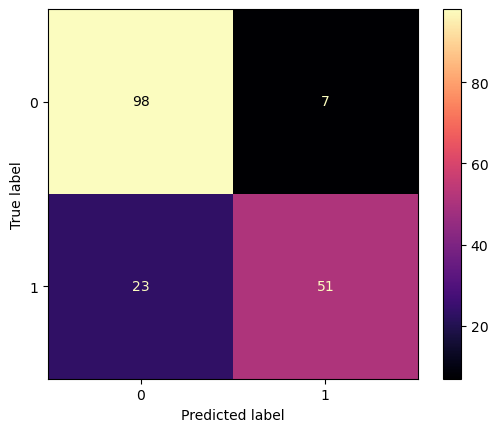

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred,cmap="magma")
print(confusion_matrix(y_test, ypred))